In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\mushrooms.csv')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')
feat_uni

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


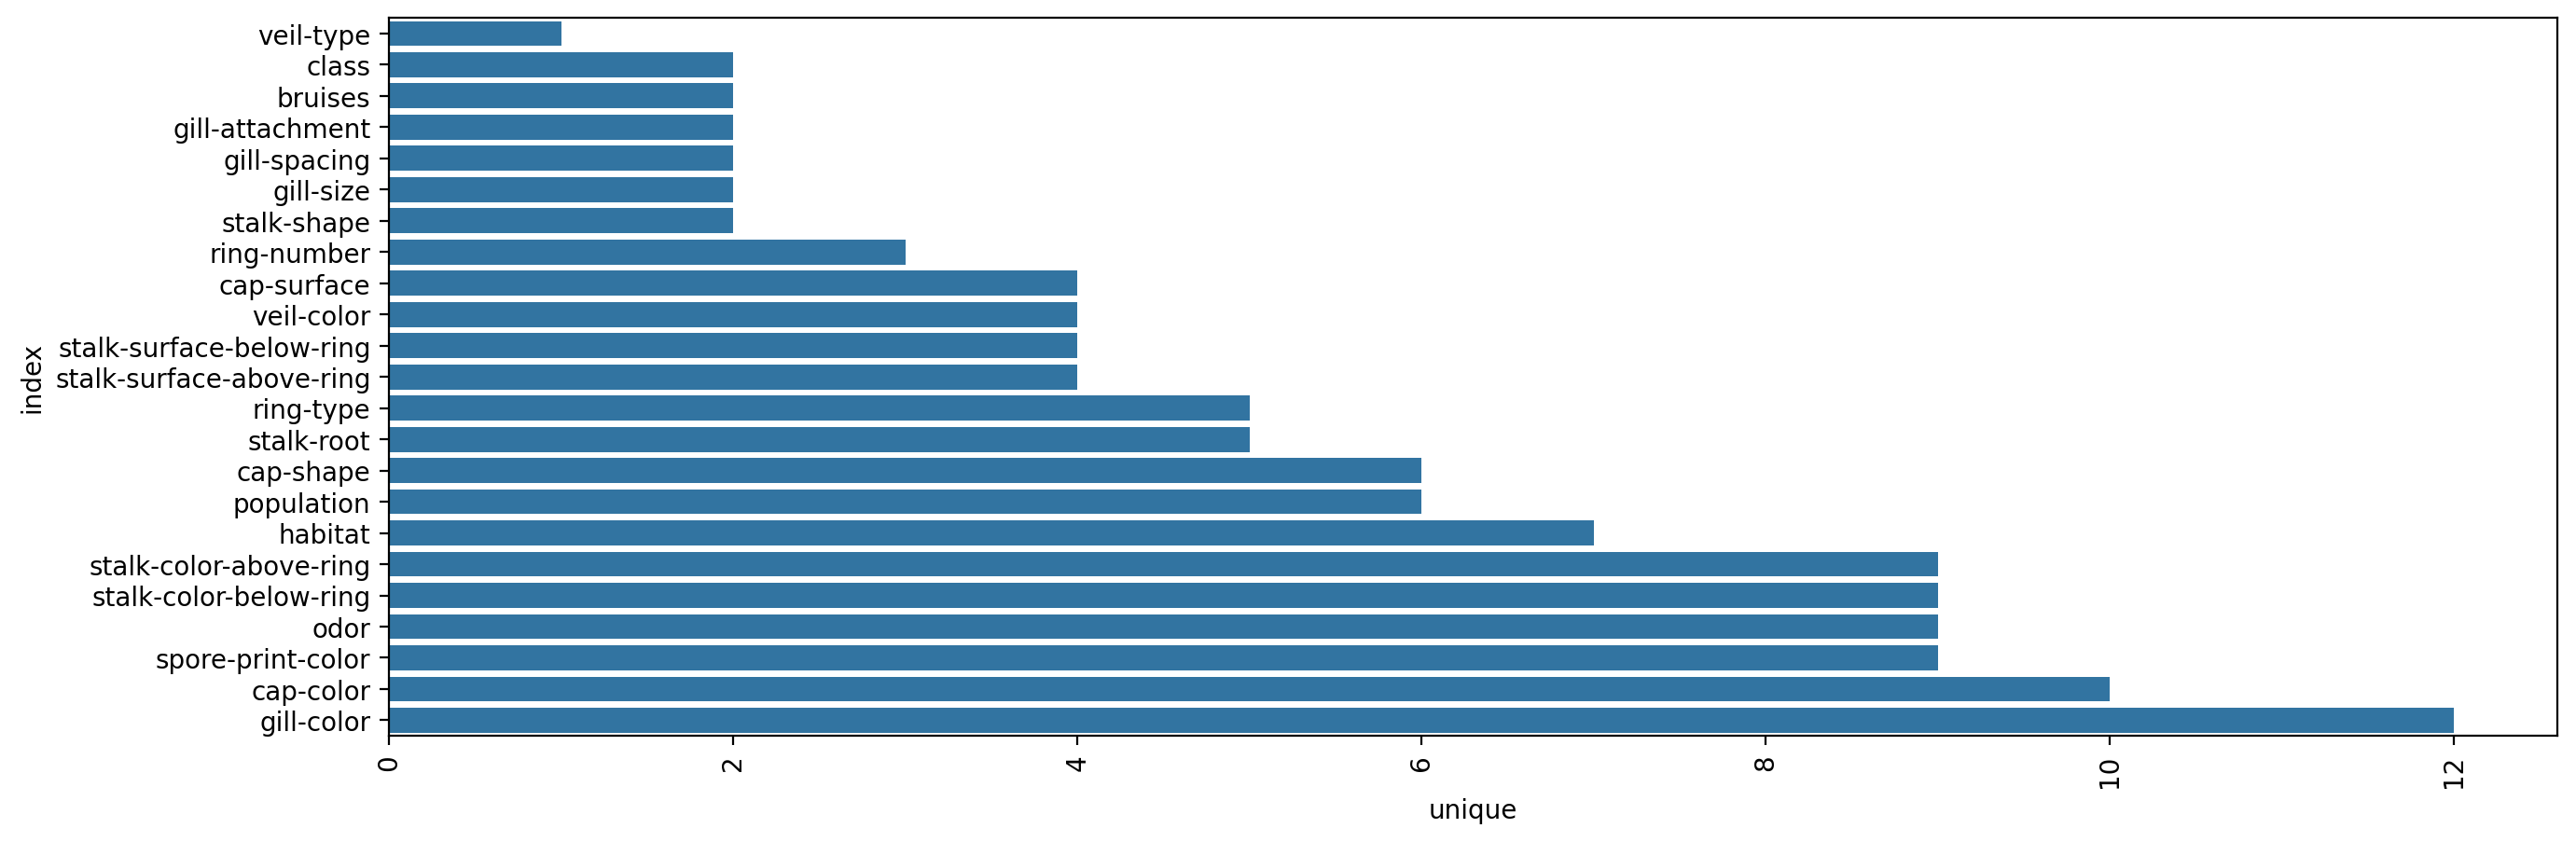

In [5]:
plt.figure(figsize=(15, 5),dpi=200)
sns.barplot(data = feat_uni, x = 'unique',y='index')
plt.xticks(rotation=90);


In [ ]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           e       0.97      0.80      0.88       637
           p       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [11]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# index 22 is the most important feature
model.feature_importances_.argmax()

np.int64(22)

In [14]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

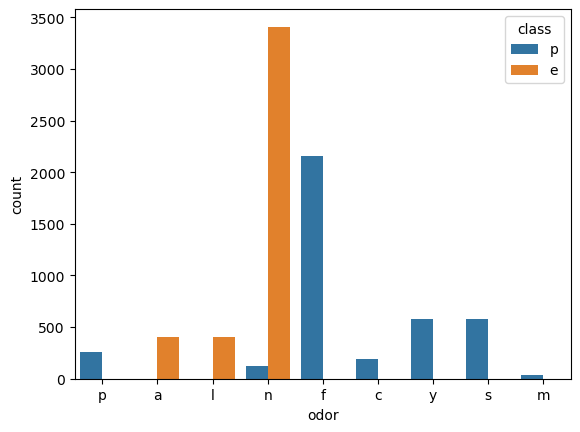

In [15]:
sns.countplot(data=df, x='odor', hue='class')

In [17]:
len(X.columns)

95

In [19]:
error_rates = []
for i in range(1, 96):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(err)


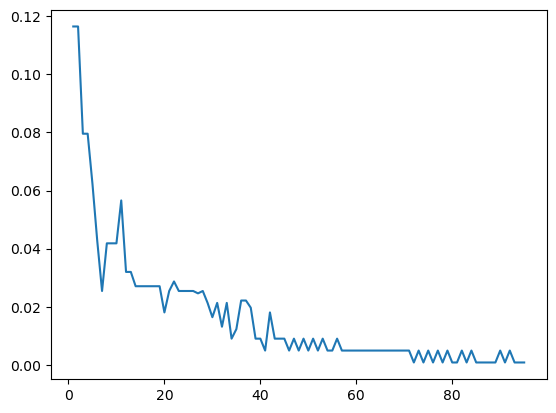

In [23]:
plt.plot(range(1, 96), error_rates)

In [24]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.12384217, 0.15338532,
       0.04233816, 0.        , 0.07738189, 0.08797391, 0.        ,
       0.        , 0.        , 0.0188799 , 0.05335077, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03628692, 0.006825  , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:

feat = pd.DataFrame(index=X.columns , data = model.feature_importances_,columns=['feature_importances_'])
imp = feat[feat['feature_importances_']>0]

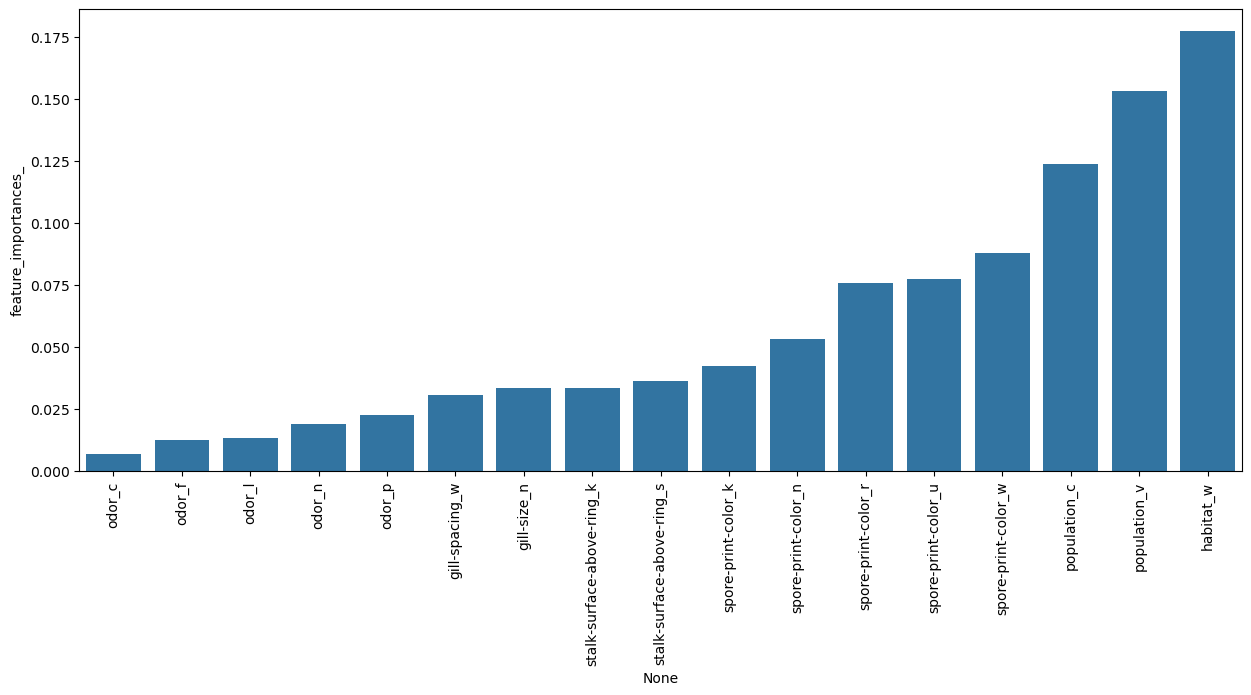

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(data=imp.sort_values('feature_importances_'),x =imp.index , y = 'feature_importances_')
plt.xticks(rotation = 90);